In [1]:
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns

from tqdm import tqdm

In [2]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
def unit_stats(x, title):
    df = {}

    df['edu'] = x.iloc[0]['education']
    df['age'] = x.iloc[0]['age']
    df['duration'] = x.iloc[0]['duration_date']
    df['organization'] = x.iloc[0]['organization']
    df[title + '_num'] = x['user_idx'].count()
    df[title + '_level'] = x['game_log_level'].mean()
    df[title + '_time'] = x['game_log_time'].mean()
    df[title + '_score'] = x['game_log_success'].mean()
    
    return pd.Series(df)

In [4]:
def user_log_arange(x, title):
    game_log = pd.read_csv("../game_log.csv", encoding='utf-8-sig', index_col='game_log_idx')
    unit_df = [game_log[game_log['unit']==n ] for n in x]
    unit = pd.concat(unit_df)
    
    unit_log = unit.groupby(['user_idx']).apply(unit_stats, (title))
    return unit_log

In [11]:
x = [2,4,7,8,9,10,11,12,13]
user_log_lobe = user_log_arange(x, 'Lobe')
x = [3, 5, 6]
user_log_memory = user_log_arange(x, 'Memory')
x = [17, 18, 19, 20]
user_log_calculation = user_log_arange(x, 'Calculation')
x = [14, 16, 15, 22]
user_log_space_recog = user_log_arange(x, 'Space_Recognize')

In [12]:
merge1 = pd.merge(user_log_lobe, user_log_memory, on=['user_idx', 'edu', 'age', 'duration', 'organization'])
merge2 = pd.merge(user_log_calculation, user_log_space_recog, on=['user_idx', 'edu', 'age', 'duration', 'organization'])
user_log_merge = pd.merge(merge1, merge2, on=['user_idx', 'edu', 'age', 'duration', 'organization'])

In [13]:
len(user_log_merge)

460

In [14]:
speed_over100_idx = user_log_merge[user_log_merge['Lobe_time'] > 100].index
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Memory_time'] > 100].index)
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Calculation_time'] > 100].index)
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Space_Recognize_time'] > 100].index)
print(speed_over100_idx)
user_log_merge = user_log_merge.drop(speed_over100_idx)
user_log_over65 = user_log_merge[user_log_merge['age']>65]

Int64Index([], dtype='int64', name='user_idx')
Int64Index([], dtype='int64', name='user_idx')
Int64Index([457], dtype='int64', name='user_idx')
Int64Index([457, 420, 460, 548, 684, 685, 687, 689, 870], dtype='int64', name='user_idx')


In [17]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_log_over65.drop('organization', axis=1))

In [29]:
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=10, max_iter=300, random_state=42)

In [30]:
label = kmeans.fit(scaled_features).labels_

In [31]:
user_log_over65['label'] = label

C:\Users\sanghyun\AppData\Local\Temp\ipykernel_2504\1191600724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_log_over65['label'] = label


# 1번 그룹은 난이도가 높은 단계까지 수행한 집단이다.

In [32]:
palette = dict(zip(np.unique(label), sns.color_palette(n_colors=6)))

In [33]:
pd.DataFrame(label).value_counts()

1    205
4    117
2     59
0     21
3     12
dtype: int64

In [34]:
np.quantile(user_log_over65['age'], [0, 0.333, 0.666, 1])

array([66., 75., 79., 97.])

In [60]:
user_log_over65[user_log_over65['label']==0]['organization']

user_idx
39      로아신경과의원
42      로아신경과의원
91      로아신경과의원
93      로아신경과의원
97      로아신경과의원
98      로아신경과의원
111     로아신경과의원
113     로아신경과의원
115     로아신경과의원
126     로아신경과의원
135       ROWAN
136       ROWAN
139     로아신경과의원
148       ROWAN
182     로아신경과의원
184     로아신경과의원
203     로아신경과의원
910     로아신경과의원
1013     남양주백병원
1041    로아신경과의원
1059     남양주백병원
Name: organization, dtype: object

In [61]:
user_log_over65[user_log_over65['label']==3]['organization']

user_idx
51         로아신경과의원
110        로아신경과의원
122        로아신경과의원
125        로아신경과의원
260        로아신경과의원
472     평택시서부노인복지관
481     용인시수지노인복지관
484     용인시수지노인복지관
569       MEET-전남대
696      MEET-이대서울
707    의왕시아름채노인복지관
893    MEET-노인보건센터
Name: organization, dtype: object

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


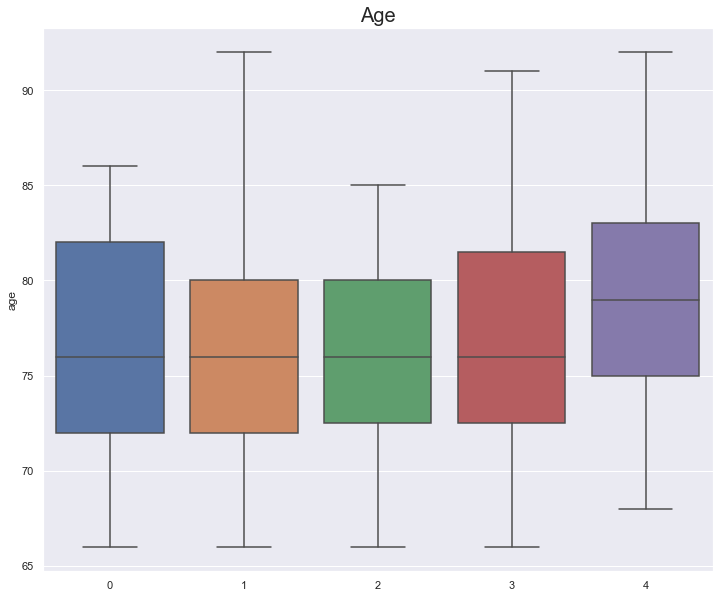

In [35]:
plt.figure(figsize=(12,10))
plt.title('Age', fontsize=20)
sns.boxplot(label, user_log_over65['age'], showfliers=False, palette=palette)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


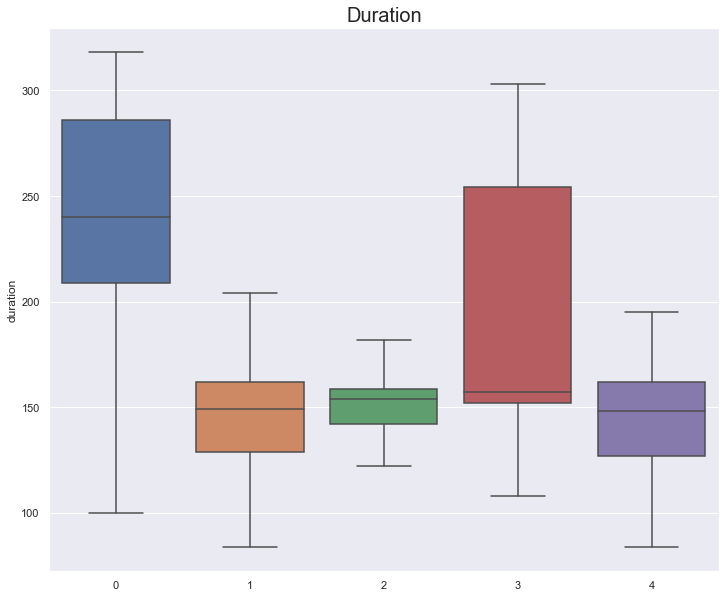

In [36]:
plt.figure(figsize=(12,10))
plt.title('Duration', fontsize=20)
sns.boxplot(label, user_log_over65['duration'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


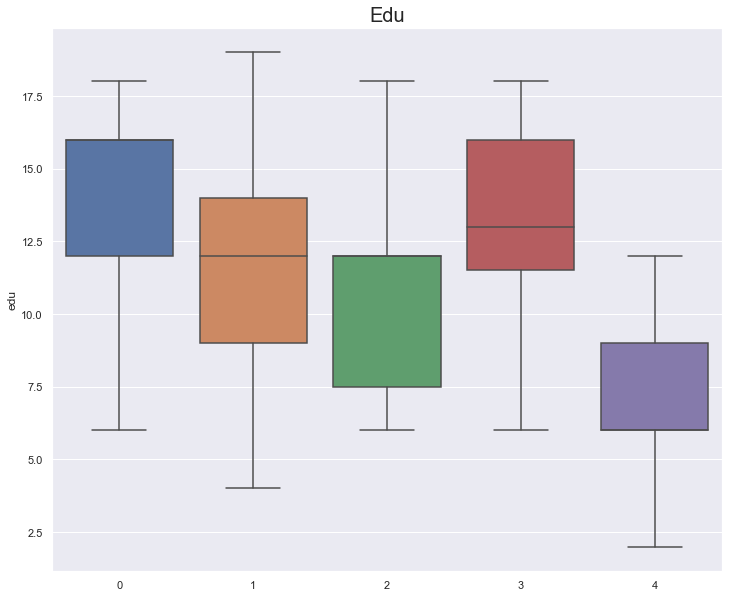

In [37]:
plt.figure(figsize=(12,10))
plt.title('Edu', fontsize=20)
sns.boxplot(label, user_log_over65['edu'], showfliers=False)
plt.show()

In [66]:
pd.DataFrame(user_log_over65['label']).to_csv('label.csv', encoding='utf-8-sig')